In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from tools.bootstrapTest import bootstrap_traces
from tools.results import data_of_interest
# from tools.results import rnai_response

## Plotting of regeneration Data

**Notes**
_interest_: datasets to look at. note that datasets aren't merged in this function

_whole_ref_: if True, compares to whole worm WT, else compares to regenerating WT

_ylim_: ylim for plotting. define eithe just one tuple to apply to all datasets, or a tuple of tuples with limits for each dataset plotted

(0, 1)
WT
(0, 1.5)
WT_30s


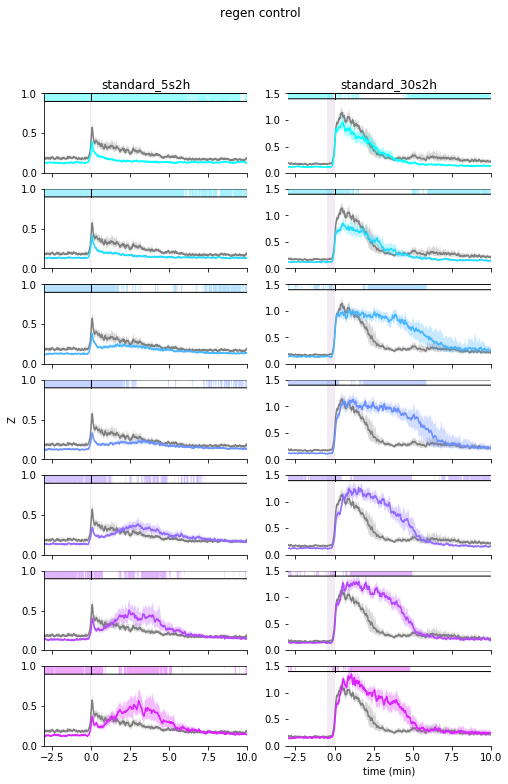

In [3]:
from tools.results_regeneration import rnai_response_regen
n_boot = 1e3
statistic=np.median
#plot_subset
interest = ['standard_5s2h','standard_30s2h']
exclude = []
fig,ax = rnai_response_regen(interest,exclude,n_boot,statistic,whole_ref=True,
                            ylim=((0,1),(0,1.5)))
for a in np.ravel(ax):
    a.set_xlim(-3,10)

## Merging regeneration data with different start points

_leaving this a more manually defined thing for now. I left the combinations you should need commented in the cell_ -SB

**Notes**

_data_: the regenerating datasets you want to combine

_day_: the start day for each dataset

_ref_: the whole worm to reference against

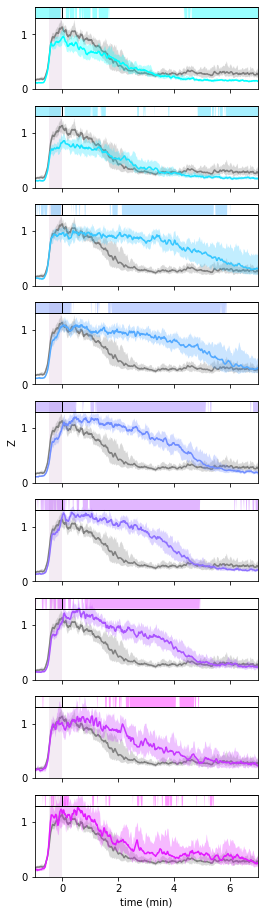

In [8]:
from tools.results_regeneration import merge_regenerations

n_boot=1e2

data = ['standard_30s2h','1002_78hpa_30s2h']
day = [0,3,]
ref = 'WT_30s'

# data = ['standard_5s2h','110521WT_72hpa_5s2h']
# day=[0,3]
# ref = 'WT'

# data = ['standard_1s2h','012821WT_72hpa_1s2h']
# day=[0,3]
# ref = 'WT_1s'

fig,ax = merge_regenerations(data,ref=ref,day=day,n_boot=n_boot,ylim=(0,1.5))